### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [88]:
data = pd.read_csv('data/coupons.csv')

In [89]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [90]:
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [91]:
data['car'].value_counts(dropna=False) # check 'car' column that has bulk of NaN values

,count
car,
NaN,12576
Scooter and motorcycle,22
Mazda5,22
do not drive,22
crossover,21
Car that is too old to install Onstar :D,21


3. Decide what to do about your missing data -- drop, replace, other...

In [92]:
# Make a copy of the original dataframe 'data' to a new dataframe 'df' which will contain cleaned data
df = data.copy()

In [93]:
df = df.rename(columns={'passanger': 'passenger'}) # rename column to correct spelling

In [94]:
# Normalise 'car' values to new column 'drives_car' that defines whether customer drives a car
car_map = {
    'Mazda5': 'Y',
    'crossover': 'Y',
    'Car that is too old to install Onstar :D': 'Y',
    'do not drive': 'N',          # assume these are erroneous records of non-driving customers
    'Scooter and motorcycle': 'N' # assume these are erroneous records of non-driving customers
}

df['drives_car'] = df['car'].map(car_map)
df['drives_car'] = df['drives_car'].fillna('Y') # assume NaN values mean customer drives
df['drives_car'].value_counts(dropna=False) # check that values have been filled correctly

,count
drives_car,
Y,12640
N,44


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [96]:
df = df[df['drives_car'] == 'Y'] # keep rows of drivers
df = df.drop(['car','drives_car'], axis=1) # remove 'car' and 'drives_car' columns that are no longer required after data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12640 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12640 non-null  object
 1   passenger             12640 non-null  object
 2   weather               12640 non-null  object
 3   temperature           12640 non-null  int64 
 4   time                  12640 non-null  object
 5   coupon                12640 non-null  object
 6   expiration            12640 non-null  object
 7   gender                12640 non-null  object
 8   age                   12640 non-null  object
 9   maritalStatus         12640 non-null  object
 10  has_children          12640 non-null  int64 
 11  education             12640 non-null  object
 12  occupation            12640 non-null  object
 13  income                12640 non-null  object
 14  Bar                   12533 non-null  object
 15  CoffeeHouse           12423 non-null  obj

In [97]:
df.dropna(inplace=True) # drop other the rest of the few rows with NaN values that would not impact results significantly
df.info() # check cleaned dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 12035 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12035 non-null  object
 1   passenger             12035 non-null  object
 2   weather               12035 non-null  object
 3   temperature           12035 non-null  int64 
 4   time                  12035 non-null  object
 5   coupon                12035 non-null  object
 6   expiration            12035 non-null  object
 7   gender                12035 non-null  object
 8   age                   12035 non-null  object
 9   maritalStatus         12035 non-null  object
 10  has_children          12035 non-null  int64 
 11  education             12035 non-null  object
 12  occupation            12035 non-null  object
 13  income                12035 non-null  object
 14  Bar                   12035 non-null  object
 15  CoffeeHouse           12035 non-null  ob

In [98]:
df.isna().sum() # check cleaned dataframe

,0
destination,0
passenger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [99]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12035.000000,12035.000000,12035.0,12035.000000,12035.000000,12035.000000,12035.000000,12035.000000
mean,63.342335,0.409971,1.0,0.561280,0.119319,0.215455,0.784545,0.569672
std,19.134895,0.491848,0.0,0.496251,0.324177,0.411155,0.411155,0.495143
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


4. What proportion of the total observations chose to accept the coupon?



In [100]:
# proportion is based on cleaned dataframe
df['Y'].value_counts(normalize=True) # proportion by total

,proportion
Y,
1,0.569672
0,0.430328


57% of total observations chose to accept the coupon.

In [101]:
df.groupby('coupon')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'coupon' type

Y,0,1
coupon,,
Bar,0.588574,0.411426
Carry out & Take away,0.261769,0.738231
Coffee House,0.502764,0.497236
Restaurant(20-50),0.554217,0.445783
Restaurant(<20),0.290847,0.709153


Coupons are highly likely to be accepted for carry outs/take aways and cheap restauratns.

In [102]:
df.groupby('destination')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'destination'

Y,0,1
destination,,
Home,0.491388,0.508612
No Urgent Place,0.365517,0.634483
Work,0.495851,0.504149


Coupons are more likely to be accepted when drivers are not heading home or to work.

In [103]:
df.groupby('passenger')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'passenger'

Y,0,1
passenger,,
Alone,0.472570,0.527430
Friend(s),0.322890,0.677110
Kid(s),0.503198,0.496802
Partner,0.405273,0.594727


Drivers with passenger friends are more likely to accept coupons.

In [104]:
df.groupby('weather')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'weather'

Y,0,1
weather,,
Rainy,0.538058,0.461942
Snowy,0.523019,0.476981
Sunny,0.404620,0.595380


Coupons have a higher acceptance rate on sunny days.

In [105]:
df.groupby('time')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'time'

Y,0,1
time,,
10AM,0.390879,0.609121
10PM,0.484194,0.515806
2PM,0.339623,0.660377
6PM,0.416694,0.583306
7AM,0.495851,0.504149


In [106]:
df.groupby('expiration')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'expiration'

Y,0,1
expiration,,
1d,0.371882,0.628118
2h,0.504624,0.495376


Longer expiry coupons have a higher acceptance rate.

In [107]:
df.groupby('gender')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'gender'

Y,0,1
gender,,
Female,0.452161,0.547839
Male,0.407306,0.592694


In [108]:
df.groupby('age')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'age'

Y,0,1
age,,
21,0.405991,0.594009
26,0.397877,0.602123
31,0.447792,0.552208
36,0.461293,0.538707
41,0.425352,0.574648
46,0.423193,0.576807
50plus,0.492494,0.507506
below21,0.367063,0.632937


In [109]:
df.groupby('maritalStatus')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by marital status

Y,0,1
maritalStatus,,
Divorced,0.474206,0.525794
Married partner,0.457048,0.542952
Single,0.388424,0.611576
Unmarried partner,0.444336,0.555664
Widowed,0.527778,0.472222


Singles are more likely to accept coupons.

In [110]:
df.groupby('has_children')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'has_children'

Y,0,1
has_children,,
0,0.410083,0.589917
1,0.459465,0.540535


In [111]:
df.groupby('education')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'education'

Y,0,1
education,,
Associates degree,0.440901,0.559099
Bachelors degree,0.443111,0.556889
Graduate degree (Masters or Doctorate),0.473124,0.526876
High School Graduate,0.405929,0.594071
Some High School,0.284091,0.715909
Some college - no degree,0.405546,0.594454


In [112]:
df.groupby('occupation')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'occupation'

Y,0,1
occupation,,
Architecture & Engineering,0.365714,0.634286
Arts Design Entertainment Sports & Media,0.466312,0.533688
Building & Grounds Cleaning & Maintenance,0.409091,0.590909
Business & Financial,0.430233,0.569767
Community & Social Services,0.502283,0.497717
Computer & Mathematical,0.436404,0.563596
Construction & Extraction,0.311688,0.688312
Education&Training&Library,0.486550,0.513450
Farming Fishing & Forestry,0.465116,0.534884


'Healthcare Practitioners & Technical' and 'Production Occupations' occupations have the highest coupon acceptance rates.



In [113]:
df.groupby('income')['Y'].value_counts(normalize=True).unstack(fill_value=0) # proportion by 'income'

Y,0,1
income,,
$100000 or More,0.421986,0.578014
$12500 - $24999,0.421454,0.578546
$25000 - $37499,0.402814,0.597186
$37500 - $49999,0.429248,0.570752
$50000 - $62499,0.410224,0.589776
$62500 - $74999,0.472619,0.527381
$75000 - $87499,0.507371,0.492629
$87500 - $99999,0.474874,0.525126
Less than $12500,0.412229,0.587771


No material relationship between income and coupon acceptance.

5. Use a bar plot to visualize the `coupon` column.

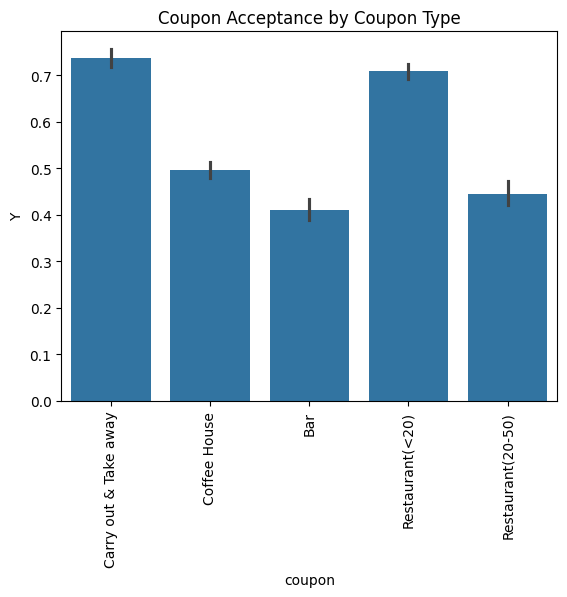

In [114]:
custom_order = ['Carry out & Take away', 'Coffee House', 'Bar', 'Restaurant(<20)','Restaurant(20-50)']
sns.barplot(x='coupon', y = 'Y', data=df, order = custom_order)
plt.xticks(rotation = 90)
plt.title('Coupon Acceptance by Coupon Type')
plt.savefig('images/bar - coupon type.png')
plt.show()

6. Use a histogram to visualize the temperature column.

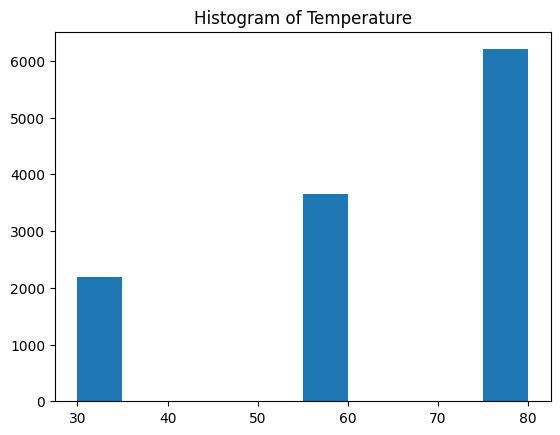

In [115]:
plt.hist(df['temperature'])
plt.title('Histogram of Temperature')
plt.savefig('images/hist - temperature.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [116]:
# cleaned dataframe - bar coupons
df_bar = df[df['coupon'] == 'Bar'].copy()
df_bar.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [117]:
proportion_bar = df_bar['Y'].value_counts(normalize=True)
print(proportion_bar)

Y
0    0.588574
1    0.411426
Name: proportion, dtype: float64


41% of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [118]:
# Normalise 'Bar' values to new column 'Bar_visit_count' that categorises whether a customer goes to a bar 3 or fewer times a month
bar_map = {
    'never': '3 or fewer',
    'less1': '3 or fewer',
    '1~3': '3 or fewer',
    '4~8': 'greater than 3',
    'gt8': 'greater than 3'
}

df_bar['visit_count'] = df_bar['Bar'].map(bar_map)
df_bar['visit_count'].value_counts(dropna=False) # check that values have been mapped correctly

,count
visit_count,
3 or fewer,1717
greater than 3,191


In [119]:
df_bar.groupby('visit_count')['Y'].value_counts(normalize=True).unstack(fill_value=0)

Y,0,1
visit_count,,
3 or fewer,0.627257,0.372743
greater than 3,0.240838,0.759162


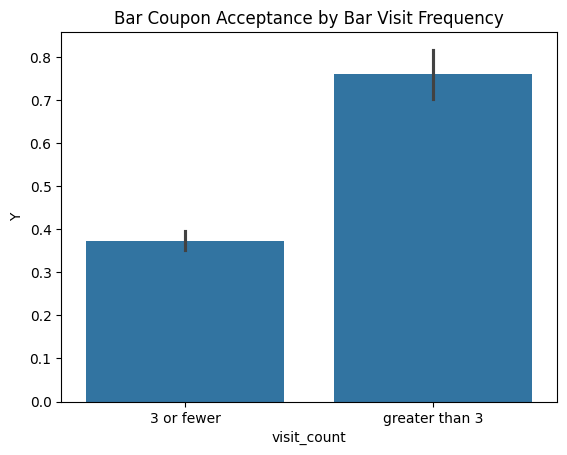

In [120]:
custom_order = ['3 or fewer', 'greater than 3']
sns.barplot(x='visit_count', y = 'Y', data=df_bar, order = custom_order)
#plt.xticks(rotation = 90)
plt.title('Bar Coupon Acceptance by Bar Visit Frequency')
plt.savefig('images/bar - bar category 3.png')
plt.show()

Acceptance rate for Bar coupons was much higher for customers who visit the bar more than 3 times a month (76%) compared to those who did less (37%).

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [121]:
# Normalise related column values to new column 'category4' based on stated conditions in Q4
def category4(row):
  if (
      row['Bar'] in ['1~3', '4~8', 'gt8']
      and row['age'] in ['26','31','36','41','46','50plus']
  ):
      return 'Visit >= once and Age > 25'
  else:
      return 'All others'

df_bar['category4'] = df_bar.apply(category4, axis=1)
df_bar['category4'].value_counts(dropna=False) # check that values have been mapped correctly

,count
category4,
All others,1507
Visit >= once and Age > 25,401


In [122]:
df_bar.groupby('category4')['Y'].value_counts(normalize=True).unstack(fill_value=0)

Y,0,1
category4,,
All others,0.662243,0.337757
Visit >= once and Age > 25,0.311721,0.688279


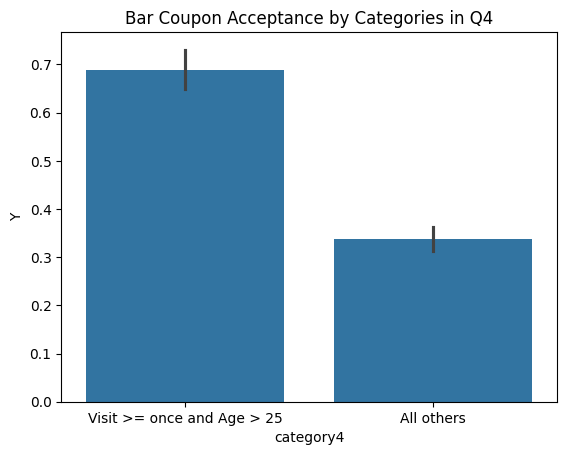

In [123]:
custom_order = ['Visit >= once and Age > 25', 'All others']
sns.barplot(x='category4', y = 'Y', data=df_bar, order = custom_order)
#plt.xticks(rotation = 90)
plt.title('Bar Coupon Acceptance by Categories in Q4')
plt.savefig('images/bar - bar category 4.png')
plt.show()

The acceptance rate for customers who visit the bar at least once a month and are above the age of 25 are more likely to accept the bar coupon (69% vs 34%).

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [124]:
# Normalise related column values to new column 'category5' based on stated conditions in Q5
def category5(row):
  if (
      row['Bar'] in ['1~3', '4~8', 'gt8']                   # go to bars once or more per month
      and row['passenger'] in ['Friend(s)','Partner']       # had adult passengers
      and row['occupation'] != 'Farming Fishing & Forestry' # occupations other than farming, fishing, or forestry
  ):
      return 'Visit >= once, Passenger no kids, occupation not FFF'
  else:
      return 'All others'

df_bar['category5'] = df_bar.apply(category5, axis=1)
df_bar['category5'].value_counts(dropna=False) # check that values have been mapped correctly

,count
category5,
All others,1720
"Visit >= once, Passenger no kids, occupation not FFF",188


In [125]:
df_bar.groupby('category5')['Y'].value_counts(normalize=True).unstack(fill_value=0)

Y,0,1
category5,,
All others,0.621512,0.378488
"Visit >= once, Passenger no kids, occupation not FFF",0.287234,0.712766


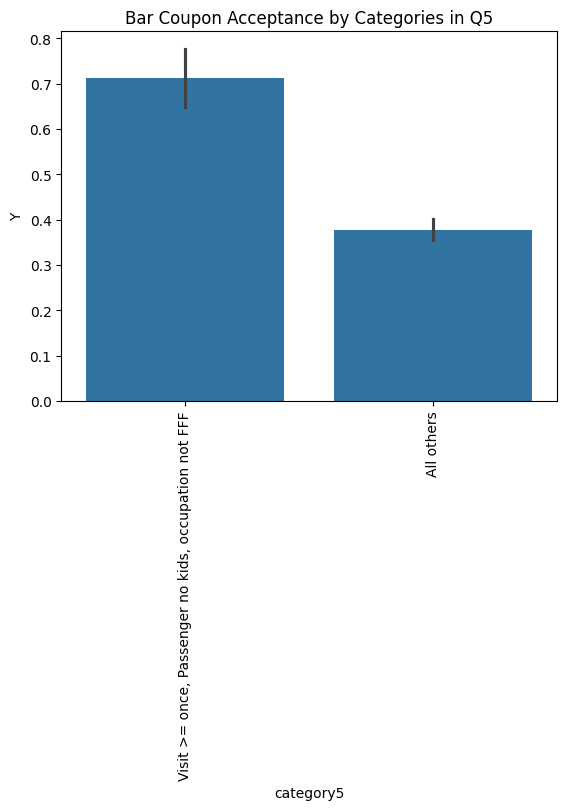

In [126]:
custom_order = ['Visit >= once, Passenger no kids, occupation not FFF', 'All others']
sns.barplot(x='category5', y = 'Y', data=df_bar, order = custom_order)
plt.xticks(rotation = 90)
plt.title('Bar Coupon Acceptance by Categories in Q5')
plt.savefig('images/bar - bar category 5.png')
plt.show()

Customers that met the conditions were more likely to accept the coupon than those who do not meet the conditions (71% vs 38%).

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [127]:
# Normalise related column values to new column 'category6' based on stated conditions in Q6
def category6(row):
  if (
      row['Bar'] in ['1~3', '4~8', 'gt8']                     # go to bars once or more per month
      and row['passenger'] in ['Friend(s)','Partner']         # had adult passengers
      and row['maritalStatus'] != 'Widowed'                   # were not widowed
  ):
      return 'Visit >= once, Passenger no kids, Not widowed'
  elif (
      row['Bar'] in ['1~3', '4~8', 'gt8']                     # go to bars once or more per month
      and row['age'] in ['below21','21','26']                 # aged below 30
  ):
      return 'Visit >= once, Age < 30'
  elif (
      row['RestaurantLessThan20'] in ['4~8', 'gt8']           # go to cheap restaurants four or more times per month
      and row['income'] in ['Less than $12500','$12500 - $24999','$25000 - $37499','$25000 - $37499','$37500 - $49999'] # income less than 50k
  ):
      return 'Cheap Restaurant Visit >= 4, Income < 50k'
  else:
      return 'All others'

df_bar['category6'] = df_bar.apply(category6, axis=1)
df_bar['category6'].value_counts(dropna=False) # check that values have been mapped correctly

,count
category6,
All others,1275
"Cheap Restaurant Visit >= 4, Income < 50k",227
"Visit >= once, Age < 30",218
"Visit >= once, Passenger no kids, Not widowed",188


In [128]:
df_bar.groupby('category6')['Y'].value_counts(normalize=True).unstack(fill_value=0)

Y,0,1
category6,,
All others,0.665098,0.334902
"Cheap Restaurant Visit >= 4, Income < 50k",0.678414,0.321586
"Visit >= once, Age < 30",0.307339,0.692661
"Visit >= once, Passenger no kids, Not widowed",0.287234,0.712766


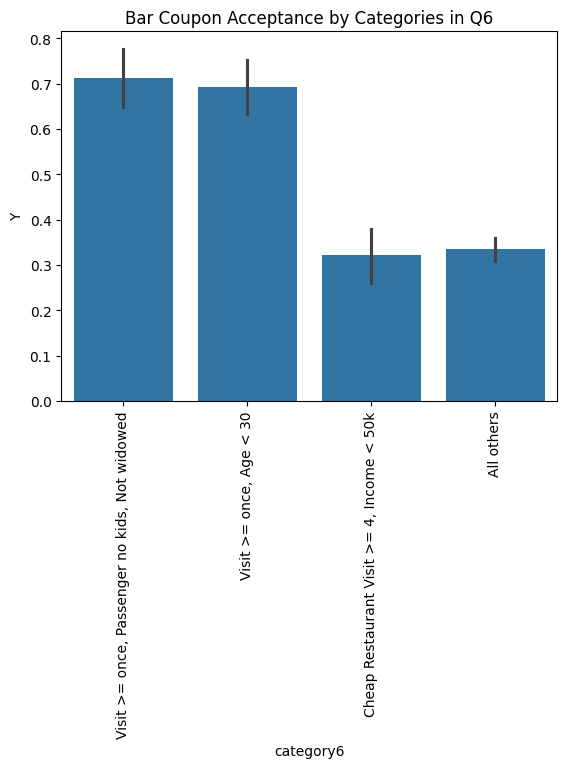

In [129]:
custom_order = ['Visit >= once, Passenger no kids, Not widowed', 'Visit >= once, Age < 30', 'Cheap Restaurant Visit >= 4, Income < 50k', 'All others']
sns.barplot(x='category6', y = 'Y', data=df_bar, order = custom_order)
plt.xticks(rotation = 90)
plt.title('Bar Coupon Acceptance by Categories in Q6')
plt.savefig('images/bar - bar category 6.png')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Given the high bar coupon acceptance rate for drivers who met the first two conditions, my hypothesis is that young drivers who visit the bar at least once a month have a higher likelihood of accepting bar coupons compared to those who don't meet these conditions.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

**Investigating the Coffee House Coupons**

Applying the same exploration of the coffee house related coupons for comparison against those of the bar coupons.  

1. Create a new `DataFrame` that contains just the Coffee House coupons.

In [130]:
# cleaned dataframe - coffee house coupons
df_ch = df[df['coupon'] == 'Coffee House'].copy()

2. What proportion of coffee house coupons were accepted?

In [131]:
proportion_ch = df_ch['Y'].value_counts(normalize=True)
print(proportion_ch)

Y
0    0.502764
1    0.497236
Name: proportion, dtype: float64


50% of the coffee house coupons were accepted.

3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

In [132]:
# Normalise 'CoffeeHouse' values to new column 'visit_count' that categorises whether a customer goes to a coffee house 3 or fewer times a month
ch_map = {
    'never': '3 or fewer',
    'less1': '3 or fewer',
    '1~3': '3 or fewer',
    '4~8': 'greater than 3',
    'gt8': 'greater than 3'
}

df_ch['visit_count'] = df_ch['CoffeeHouse'].map(ch_map)
df_ch['visit_count'].value_counts(dropna=False) # check that values have been mapped correctly

,count
visit_count,
3 or fewer,2960
greater than 3,839


In [133]:
df_ch.groupby('visit_count')['Y'].value_counts(normalize=True).unstack(fill_value=0)

Y,0,1
visit_count,,
3 or fewer,0.553041,0.446959
greater than 3,0.325387,0.674613


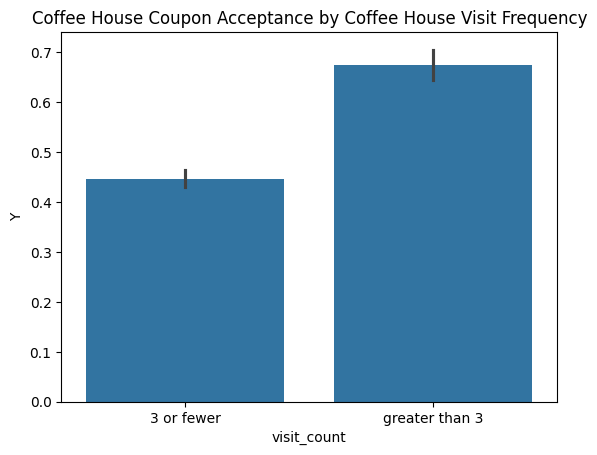

In [134]:
custom_order = ['3 or fewer', 'greater than 3']
sns.barplot(x='visit_count', y = 'Y', data=df_ch, order = custom_order)
#plt.xticks(rotation = 90)
plt.title('Coffee House Coupon Acceptance by Coffee House Visit Frequency')
plt.savefig('images/bar - ch category 3.png')
plt.show()

Acceptance rate for Coffee House coupons was much higher for customers who visit the Coffee House more than 3 times a month (66%) compared to those who did less (34%).

Plot both coupon types in the same bar plot.

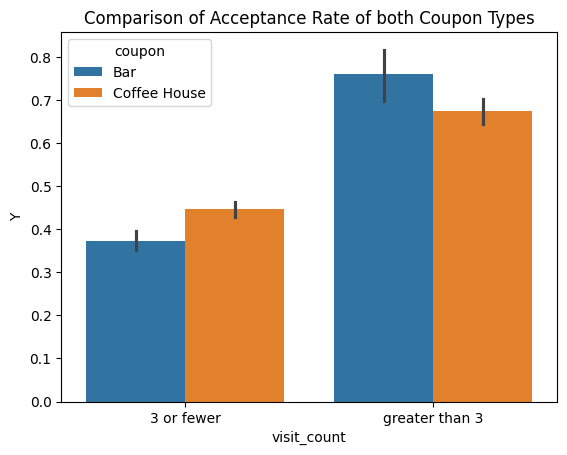

In [135]:
# Plot both coupon types in the same bar plot.
df_combined = pd.concat([df_bar, df_ch]) # Combine both dataframes into one for comparison.
sns.barplot(data=df_combined, x='visit_count', y='Y', hue='coupon')
plt.title("Comparison of Acceptance Rate of both Coupon Types")
plt.savefig('images/bar - bch category 3.png')
plt.show()

The columns used in the conditions in Q3 are more useful for estimating the likelihood of coupon acceptance for bar coupons than for coffee house coupons.

4. Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others. Is there a difference?

In [136]:
# Normalise related column values to new column 'category4' based on stated conditions in Q4
def category4x(row):
  if (
      row['CoffeeHouse'] in ['1~3', '4~8', 'gt8']
      and row['age'] in ['26','31','36','41','46','50plus']
  ):
      return 'Visit >= once and Age > 25'
  else:
      return 'All others'

df_ch['category4'] = df_ch.apply(category4x, axis=1)
df_ch['category4'].value_counts(dropna=False) # check that values have been mapped correctly

,count
category4,
All others,2469
Visit >= once and Age > 25,1330


In [137]:
df_ch.groupby('category4')['Y'].value_counts(normalize=True).unstack(fill_value=0)

Y,0,1
category4,,
All others,0.579992,0.420008
Visit >= once and Age > 25,0.359398,0.640602


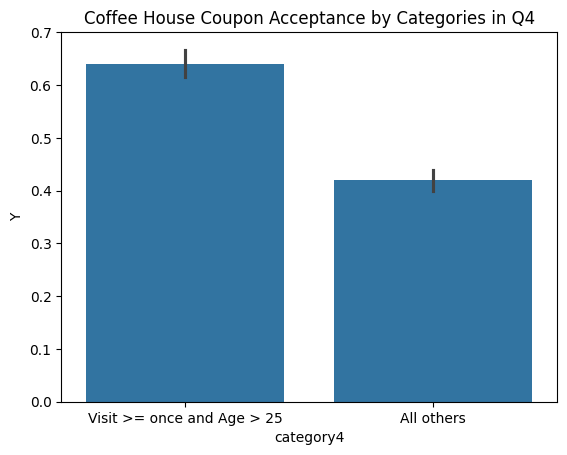

In [138]:
custom_order = ['Visit >= once and Age > 25', 'All others']
sns.barplot(x='category4', y = 'Y', data=df_ch, order = custom_order)
#plt.xticks(rotation = 90)
plt.title('Coffee House Coupon Acceptance by Categories in Q4')
plt.savefig('images/bar - ch category 4.png')
plt.show()

The acceptance rate for customers who visit the coffee house at least once a month and are above the age of 25 are more likely to accept the coffee house coupon (64% vs 42%).

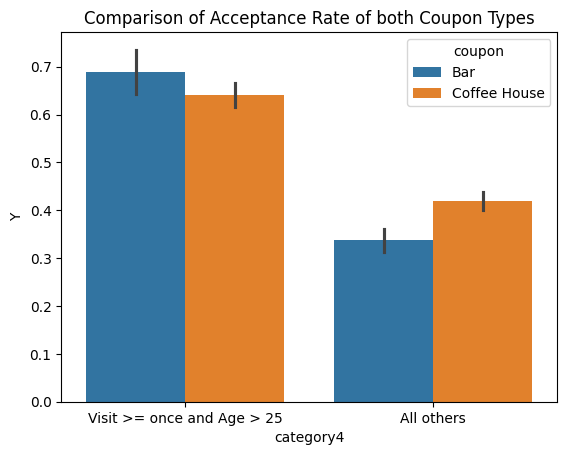

In [139]:
# Plot both coupon types in the same bar plot.
df_combined = pd.concat([df_bar, df_ch]) # Combine both dataframes into one for comparison.
sns.barplot(data=df_combined, x='category4', y='Y', hue='coupon', order = custom_order)
plt.title("Comparison of Acceptance Rate of both Coupon Types")
plt.savefig('images/bar - bch category 4.png')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to coffee houses more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [140]:
# Normalise related column values to new column 'category5' based on stated conditions in Q5
def category5x(row):
  if (
      row['CoffeeHouse'] in ['1~3', '4~8', 'gt8']           # go to coffee houses once or more per month
      and row['passenger'] in ['Friend(s)','Partner']       # had adult passengers
      and row['occupation'] != 'Farming Fishing & Forestry' # occupations other than farming, fishing, or forestry
  ):
      return 'Visit >= once, Passenger no kids, occupation not FFF'
  else:
      return 'All others'

df_ch['category5'] = df_ch.apply(category5x, axis=1)
df_ch['category5'].value_counts(dropna=False) # check that values have been mapped correctly

,count
category5,
All others,3100
"Visit >= once, Passenger no kids, occupation not FFF",699


In [141]:
df_ch.groupby('category5')['Y'].value_counts(normalize=True).unstack(fill_value=0)

Y,0,1
category5,,
All others,0.564516,0.435484
"Visit >= once, Passenger no kids, occupation not FFF",0.228898,0.771102


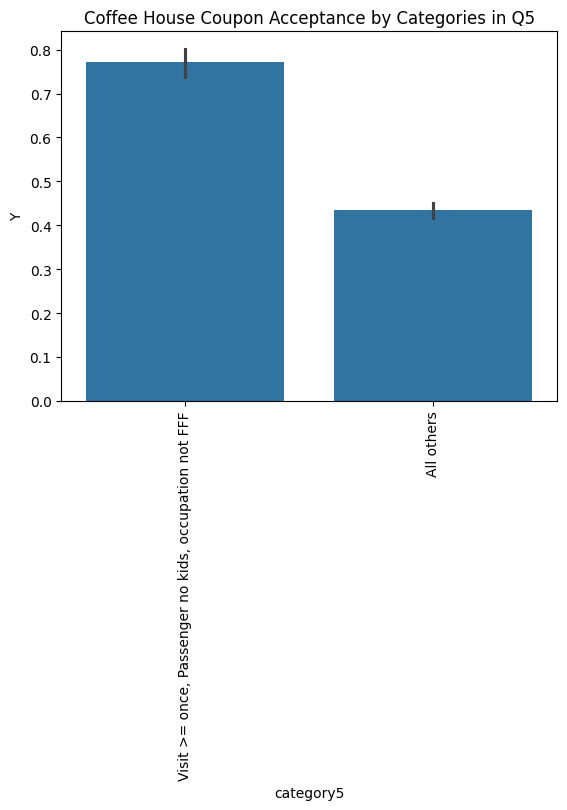

In [142]:
custom_order = ['Visit >= once, Passenger no kids, occupation not FFF', 'All others']
sns.barplot(x='category5', y = 'Y', data=df_ch, order = custom_order)
plt.xticks(rotation = 90)
plt.title('Coffee House Coupon Acceptance by Categories in Q5')
plt.savefig('images/bar - ch category 5.png')
plt.show()

Customers that met the condition were alot more likely to accept the coupon than those who do not meet the condition (77% vs 44%).

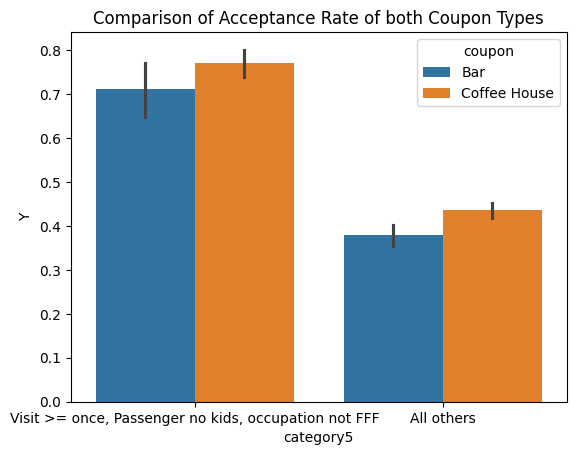

In [143]:
# Plot both coupon types in the same bar plot.
df_combined = pd.concat([df_bar, df_ch]) # Combine both dataframes into one for comparison.
sns.barplot(data=df_combined, x='category5', y='Y', hue='coupon', order = custom_order)
plt.title("Comparison of Acceptance Rate of both Coupon Types")
plt.savefig('images/bar - bch category 5.png')
plt.show()

The columns used in the conditions in Q5 are more useful for estimating the likelihood of coupon acceptance for coffee house coupons than for bar coupons. The variability around the mean is also lower for coffee house coupons.

6. Compare the acceptance rates between those drivers who:

- go to coffee houses more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to coffee houses more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [144]:
# Normalise related column values to new column 'category6' based on stated conditions in Q6
def category6x(row):
  if (
      row['CoffeeHouse'] in ['1~3', '4~8', 'gt8']             # go to coffee houses once or more per month
      and row['passenger'] in ['Friend(s)','Partner']         # had adult passengers
      and row['maritalStatus'] != 'Widowed'                   # were not widowed
  ):
      return 'Visit >= once, Passenger no kids, Not widowed'
  elif (
      row['CoffeeHouse'] in ['1~3', '4~8', 'gt8']             # go to coffee houses once or more per month
      and row['age'] in ['below21','21','26']                 # aged below 30
  ):
      return 'Visit >= once, Age < 30'
  elif (
      row['RestaurantLessThan20'] in ['4~8', 'gt8']           # go to cheap restaurants four or more times per month
      and row['income'] in ['Less than $12500','$12500 - $24999','$25000 - $37499','$25000 - $37499','$37500 - $49999'] # income less than 50k
  ):
      return 'Cheap Restaurant Visit >= 4, Income < 50k'
  else:
      return 'All others'

df_ch['category6'] = df_ch.apply(category6x, axis=1)
df_ch['category6'].value_counts(dropna=False) # check that values have been mapped correctly

,count
category6,
All others,2169
"Visit >= once, Passenger no kids, Not widowed",699
"Visit >= once, Age < 30",564
"Cheap Restaurant Visit >= 4, Income < 50k",367


In [145]:
df_ch.groupby('category6')['Y'].value_counts(normalize=True).unstack(fill_value=0)

Y,0,1
category6,,
All others,0.610420,0.389580
"Cheap Restaurant Visit >= 4, Income < 50k",0.574932,0.425068
"Visit >= once, Age < 30",0.381206,0.618794
"Visit >= once, Passenger no kids, Not widowed",0.228898,0.771102


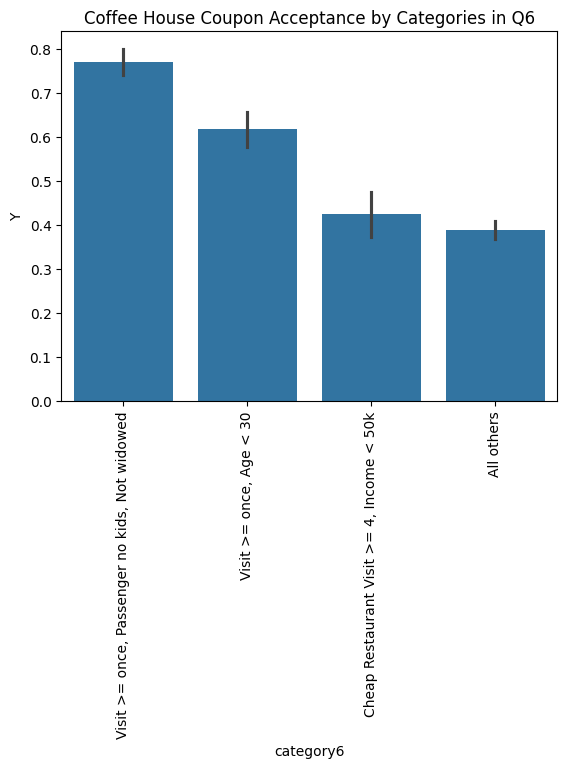

In [146]:
custom_order = ['Visit >= once, Passenger no kids, Not widowed', 'Visit >= once, Age < 30', 'Cheap Restaurant Visit >= 4, Income < 50k', 'All others']
sns.barplot(x='category6', y = 'Y', data=df_ch, order = custom_order)
plt.xticks(rotation = 90)
plt.title('Coffee House Coupon Acceptance by Categories in Q6')
plt.savefig('images/bar - ch category 6.png')
plt.show()

7. Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Given the high coffee house coupon acceptance rate for drivers who met the first two conditions, my hypothesis is that young drivers who visit the coffee house at least once a month have a higher likelihood of accepting coffee house coupons compared to those who don't meet these conditions.

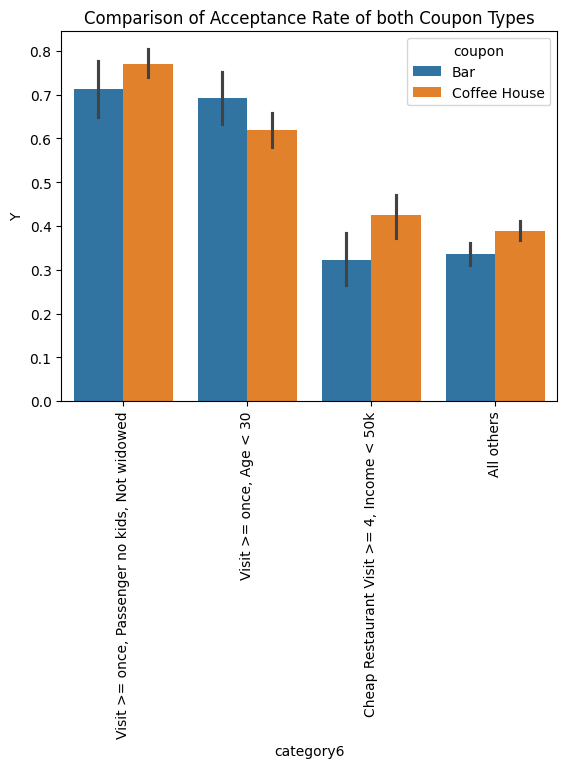

In [147]:
# Plot both coupon types in the same bar plot.
df_combined = pd.concat([df_bar, df_ch]) # Combine both dataframes into one for comparison.
sns.barplot(data=df_combined, x='category6', y='Y', hue='coupon', order = custom_order)
plt.title("Comparison of Acceptance Rate of both Coupon Types")
plt.xticks(rotation = 90)
plt.savefig('images/bar - bch category 6.png')
plt.show()

The columns used in the first two conditions of Q6 can be used to estimate the coupon acceptance rate for both 'Coffee House' and 'Bar' coupons. Particularly, the first condition is especially useful for 'Coffee House' coupon acceptance given the higher rate of acceptance and low variability around the mean.